# <center> The Office Analysis </center>

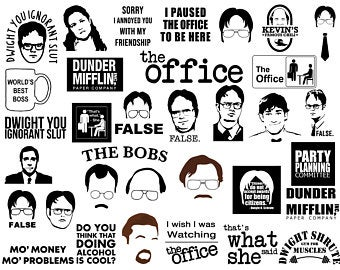

The Office is an American mockumentary sitcom television series that depicts the everyday work lives of office employees in the Scranton, Pennsylvania branch of the fictional Dunder Mifflin Paper Company. It aired on NBC from March 24, 2005, to May 16, 2013, lasting a total of **nine** seasons.

The Office was met with mixed reviews during its short first season, but the following seasons, particularly those featuring **Steve Carell**, received significant acclaim from television critics as the show's characters, content, structure, and tone diverged considerably from the British version. Later seasons were criticized for a decline in quality, with many seeing Carell's departure in season seven as a contributing factor; however, the final season ended the series' run with a generally positive response.

The Office was by far the most popular show to stream on **Netflix** in **2018**. Viewers spent **52.1 billion** minutes streaming the completed NBC series.

This notebook is an analysis of how the TV show has performed over the years along with some interesting insights. 

### Table of Contents

* [Number of episodes per season](#section_1_1)
* [Top 10 highest rated episodes of all time](#section_1_2)
* [Ratings for each season](#section_1_2_1_1)
* [Top 10 longest episodes of all time](#section_1_2_2)
* [Number of guest stars appeared each season](#chapter2)
* [Top 10 highest voted episodes of all time](#section_2_2)
* [Top 10 episodes with highest viewership of all time](#section_2_3)
* [List of Christmas special episodes](#section_2_5)
* [Viewership based on Ratings and Votes for each Season](#section_2_6)
* [Names of Director who directed Top 5 highest rated episodes](#section_2_7)
* [Season 5 - Mini Infograph](#section_2_8)
* [Number of times Michael cracked That's What She Said joke](#section_2_9)
* [Number of That's What She Said Jokes per Season](#section_2_10)
* [Number of times Andy mentions Cornell](#section_2_11)
* [Number of times Pam said 'Dunder Mifflin, this is Pam'](#section_2_12)
* [Number of times Angela talks about her Cats](#section_2_13)
* [Number of times Kelly said 'Ryan'](#section_2_14)
* [Number of That's What She Said Jokes by Character](#section_2_15)
* [Number of times Dwight said 'MICHAEL'](#section_2_16)

In [ ]:
# importing libraries
import numpy as np
import pandas as pd 
import re
%matplotlib inline
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.express as px
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
import plotly.graph_objects as go
init_notebook_mode(connected=True)
import cufflinks as cf
cf.go_offline()

### About the datasets

In [ ]:
# reading the dataset
datapath = '../input/the-office-dataset/the_office_series.csv'
dataset = pd.read_csv(datapath)

# dropping unnamed column
df = dataset.loc[:, ~dataset.columns.str.contains('^Unnamed')]
df.head()

#reading lines
l_df = pd.read_csv('../input/the-office-us-complete-dialoguetranscript/The-Office-Lines-V3.csv', encoding='latin-1')

I am going to use the following two datasets in this notebook:- 

1) The Office IMDb Dataset 

2) The Office transcripts/dialogues

The Office IMDb dataset contains:-

**Season** : Season Number ( 1 to 9 )

**EpisodeTitle** : Name of the episode

**About** : Description of the episode

**Ratings** : Ratings given to the episode on IMDb

**Votes** : Votes given to the episode on IMDb

**Viewership** : Number of viewers in US ( in millions )

**Duration** : Duration of the episode ( in minutes ) 

**Date** : Release date of the episode

**GuestStars** : Number of guest stars appeared on the episode

**Director** : Director(s) of the episode

**Writers** : Writer(s) of the episode

The Office transcripts contains:-

**season** : season number

**episode** : episode number

**title** : episode title

**scene** : scene number

**speaker** : speaker in the scene

**line** : lines of the speaker

### Number of episodes per season <a class="anchor" id="section_1_1"></a>

In [ ]:
g1 = df.groupby(['Season'], as_index=False).count()
g1 = g1[['Season','EpisodeTitle']]
g1.rename(columns={'EpisodeTitle':'NoOfEpisodes'}, inplace=True)

fig = px.bar(g1,x='Season',y='NoOfEpisodes', color_discrete_sequence=['green'])
fig.update_layout(title_text='Number of episodes per Season',template='plotly_dark')
fig.show()

**Season 1** comprised of only **6** episodes. After that the show was consistent and had episodes between **22-26** except for **Season 4** which had **14** episodes.

### Top 10 highest rated episodes of all time <a class="anchor" id="section_1_2"></a>

In [ ]:
top_10_rated = (df.sort_values(by=['Ratings','Votes'],ascending=False)).iloc[:10,:]
fig = px.bar(top_10_rated,x='EpisodeTitle',y='Ratings',color_discrete_sequence=['purple'])
fig.update_layout(title_text='Top 10 highest rated episodes of all time',template='plotly_dark')
fig.show()

For highest rated episode, 
there seems to be a **tie** between two episodes - **Goodbye, Michael** and **Finale** both being rated **9.8**. 

Fun fact is that Steve Carell's contract ended and he left the show in Goodbye, Michael and returned for the Finale episode.

### Ratings for each season <a class="anchor" id="section_1_2_1_1"></a>

In [ ]:
rats = pd.DataFrame(df.groupby(['Season'])['Ratings'].mean()).reset_index()
fig = px.line(rats,x='Season',y='Ratings')
fig.update_layout(title_text='Ratings for each season',template='plotly_dark')
fig.show()

There has been a decline in the average ratings of Season **8** as compared to previous seasons. The season recorded the lowest ratings of all times i.e **7.6**. I wonder if this happened because of Steve Carell's exit ?

### Top 10 longest episodes of all time <a class="anchor" id="section_1_2_2"></a>

In [ ]:
top_10_long = (df.sort_values(by=['Duration','Ratings'],ascending=False)).iloc[:10,:]
fig = px.bar(top_10_long,x='EpisodeTitle',y='Duration',color_discrete_sequence=['gold'])
fig.update_layout(title_text='Top 10 longest episodes of all time',template='plotly_dark')
fig.show()

### Number of guest stars appeared each season <a class="anchor" id="chapter2"></a>

In [ ]:
g3 = df.groupby('Season')['GuestStars'].count().reset_index()
g3_df = pd.DataFrame(g3)
#fig = px.pie(names=g3_df['Season'], values=g3_df['GuestStars'])

fig = go.Figure(data=[go.Pie(labels=g3['Season'], values=g3['GuestStars'],
                             sort=False,marker=dict(colors=px.colors.qualitative.Prism))])


fig.update_layout(title_text='Number of guest stars appeared each season',template='plotly_dark')
fig.show()

### Top 10 highest voted episodes of all time <a class="anchor" id="section_2_2"></a>

In [ ]:
top_10_voted = (df.sort_values(by=['Votes','Ratings'],ascending=False)).iloc[:10,:]
fig = px.bar(top_10_rated,x='EpisodeTitle',y='Votes',color_discrete_sequence=['turquoise'])
fig.update_layout(title_text='Top 10 highest voted episodes of all time',template='plotly_dark')
fig.show()

### Top 10 episodes with highest viewership of all time <a class="anchor" id="section_2_3"></a>

In [ ]:
top_10_view = (df.sort_values(by=['Viewership','Ratings'],ascending=False)).iloc[:10,:]
fig = px.bar(top_10_rated,x='EpisodeTitle',y='Viewership',color_discrete_sequence=['red'])
fig.update_layout(title_text='Top 10 episodes with highest viewership of all time',template='plotly_dark')
fig.show()

### List of Christmas special episodes <a class="anchor" id="section_2_5"></a>

In [ ]:
index_list = []
for i in range(0,len(df)):
    x = re.findall('Christmas|christmas|Santa|santa',df['EpisodeTitle'][i])
    if x :
        index_list.append(df.index[i])

for i in index_list:
    print(df.EpisodeTitle[i])

### Viewership based on Ratings and Votes for each Season <a class="anchor" id="section_2_6"></a>

In [ ]:
fig = px.scatter(df,x='Ratings',y='Votes',color='Season',
                 size='Viewership',size_max=60)
fig.update_layout(title_text='Viewership based on ratings and votes for each season',
                  template='plotly_dark')
fig.show()

### Names of Director who directed Top 5 highest rated episodes <a class="anchor" id="section_2_7"></a>

In [ ]:
top_5_rated = (df.sort_values(by=['Ratings','Votes'],ascending=False)).iloc[:5,:]
ep = top_5_rated['EpisodeTitle'].tolist()
dir=top_5_rated['Director'].tolist()
season=top_5_rated['Season'].tolist()

fig = go.Figure(data=[go.Table(header=dict(values=['Season','Episode Title','Director'],
                                          fill_color='blue',
                                           height=30),
                 cells=dict(values=[season,ep, dir],
                            height=30))
                     ])
fig.update_layout(title_text='Names of directors who directed top 5 highest rated episodes',
                  template='plotly_dark')
fig.show()

### Season 5 - Mini Infograph <a class="anchor" id="section_2_8"></a>

In [ ]:
s5 = df[df['Season']==5]

avg_ratings = s5.Ratings.mean()
avg_votes = s5.Votes.mean()
avg_view = s5.Viewership.mean()
avg_time = s5.Duration.mean()

fig = make_subplots(
    rows=2, cols=2,subplot_titles=('Average Ratings','Average Votes',
                                   'Average Viewership (millions)', 'Average Episode Duration'),
    specs=[[{'type': 'indicator'},{'type': 'indicator'} ],
          [ {'type': 'indicator'} , {'type': 'indicator'}]])

fig.add_trace(go.Indicator(
    mode = 'number+delta',
    value = avg_ratings,
    number={'font':{'color': 'silver','size':50}},
    domain = {'x': [0, 0.5], 'y': [0, 0.5]},
    delta = {'reference': 8.56}
),row=1, col=1)


fig.add_trace(go.Indicator(
    mode = 'number+delta',
    value = avg_votes,
    number={'font':{'color': 'silver','size':50}},
    domain = {'x': [0, 0.5], 'y': [0, 0.5]},
    delta = {'reference': 3196}
),row=1, col=2)


fig.add_trace(go.Indicator(
    mode = 'number+delta',
    value = avg_view,
    number={'font':{'color': 'silver','size':50}},
    domain = {'x': [0, 0.5], 'y': [0, 0.5]},
    delta = {'reference': 8.55}
),row=2, col=1)

fig.add_trace(go.Indicator(
    mode = 'number+delta',
    value = avg_time,
    number={'font':{'color': 'silver','size':50}},
    domain = {'x': [0, 0.5], 'y': [0, 0.5]},
    delta = {'reference': 32.5}
),row=2, col=2)


fig.update_layout(
    title_text='Season 5-Mini Infograph',
    template='plotly_dark',
    title_x=0.5,font=dict(
        size=18,
        color='gold'
    ))

fig.show()

### Number of times Michael cracked That's What She Said joke <a class="anchor" id="section_2_9"></a>

In [ ]:
michael_df = l_df[l_df['speaker']=='Michael'].reset_index()

mcount = 0

for i in range(0,len(michael_df)):
    x = re.search('that\'s what she said',michael_df['line'][i])
    y = re.search('That\'s what she said',michael_df['line'][i])
    if type(x)==re.Match:
        mcount = mcount + 1
    if type(y)==re.Match:
        mcount = mcount + 1

fig = go.Figure(go.Indicator(
    mode = 'number',
    value = mcount,
    title = {'text': 'Number of times Michael cracked That\'s What She Said joke'},
   
))

fig.update_layout(template='plotly_dark')

fig.show()

### Number of That's What She Said Jokes per Season <a class="anchor" id="section_2_10"></a>

In [ ]:
def get_count(l_df,n):
    s_df = l_df[l_df['season']==n].reset_index()
    scount = 0
    for i in range(0,len(s_df)):
        x = re.search('that\'s what she said',s_df['line'][i])
        y = re.search('That\'s what she said',s_df['line'][i])
        if type(x)==re.Match:
            scount = scount + 1
        if type(y)==re.Match:
            scount = scount + 1
    return scount

sc , s = [] , []
for i in range(1,10):
    sc.append(get_count(l_df,i))
    s.append(i)

fig = px.bar(x=sc,y=s,color_discrete_sequence=['#7ec0ee'],
             orientation='h',labels={'sc':'# of jokes',
                                    's':'Season'})
fig.update_layout(title_text='Number of That\'s What She Said Jokes per Season',
                  template='plotly_dark',xaxis_title='# of Jokes',yaxis_title='Season')
fig.show()

### Number of times Andy mentions Cornell <a class="anchor" id="section_2_11"></a>

In [ ]:
andy_df = l_df[l_df['speaker']=='Andy'].reset_index()

acount = 0

for i in range(0,len(andy_df)):
    x = re.search('Cornell',andy_df['line'][i])
    y = re.search('cornell',andy_df['line'][i])
    if type(x)==re.Match:
        acount = acount + 1
    if type(y)==re.Match:
        acount = acount + 1

fig = go.Figure(go.Indicator(
    mode = 'number',
    value = acount,
    title = {'text': 'Number of times Andy mentions Cornell'},
   
))

fig.update_layout(template='plotly_dark')

fig.show()
    

### Number of times Pam said 'Dunder Mifflin, this is Pam' <a class="anchor" id="section_2_12"></a>

In [ ]:
pam_df = l_df[l_df['speaker']=='Pam'].reset_index()

pcount = 0

for i in range(0,len(pam_df)):
    x = re.search('Dunder Mifflin this is Pam',pam_df['line'][i])
    y = re.search('Dunder Mifflin, this is Pam',pam_df['line'][i])
    if type(x)==re.Match:
        pcount = pcount + 1
    if type(y)==re.Match:
        pcount = pcount + 1

fig = go.Figure(go.Indicator(
    mode = 'number',
    value = pcount,
    title = {'text': 'Number of times Pam said \'Dunder Mifflin, this is Pam\''}
   
))

fig.update_layout(template='plotly_dark')

fig.show()

### Number of times Angela talks about her Cats <a class="anchor" id="section_2_13"></a>

In [ ]:
ang_df = l_df[l_df['speaker']=='Angela'].reset_index()

angcount = 0

for i in range(0,len(ang_df)):
    x = re.search('Cats',ang_df['line'][i])
    y = re.search('cats',ang_df['line'][i])
    z = re.search('cat',ang_df['line'][i])
    w = re.search('Cat',ang_df['line'][i])
    if type(x)==re.Match:
        angcount = angcount + 1
    if type(y)==re.Match:
        angcount = angcount + 1
    if type(z)==re.Match:
        angcount = angcount + 1
    if type(w)==re.Match:
        angcount = angcount + 1

fig = go.Figure(go.Indicator(
    mode = 'number',
    value = angcount,
    title = {'text': 'Number of times Angela talks about her Cats'},
   
))

fig.update_layout(template='plotly_dark')

fig.show()

### Number of times Kelly said 'Ryan' <a class="anchor" id="section_2_14"></a>

In [ ]:
kelly_df = l_df[l_df['speaker']=='Kelly'].reset_index()

kcount = 0

for i in range(0,len(kelly_df)):
    x = re.search('Ryan',kelly_df['line'][i])
    y = re.search('ryan',kelly_df['line'][i])
    if type(x)==re.Match:
        kcount = kcount + 1
    if type(y)==re.Match:
        kcount = kcount + 1

fig = go.Figure(go.Indicator(
    mode = 'number',
    value = kcount,
    title = {'text': 'Number of times Kelly said \'Ryan\''}
   
))

fig.update_layout(template='plotly_dark')

fig.show()

### Number of That's What She Said Jokes by Character <a class="anchor" id="section_2_15"></a>

In [ ]:
def twss_count(l_df,char):
    twsscount = 0

    l_df = l_df[l_df['speaker']==char].reset_index()

    for i in range(0,len(l_df)):
        x = re.search('that\'s what she said',l_df['line'][i])
        y = re.search('That\'s what she said',l_df['line'][i])
        if type(x)==re.Match:
            twsscount = twsscount + 1
        if type(y)==re.Match:
            twsscount = twsscount + 1
    return twsscount

chars = ['Pam','Dwight','Jim','Michael']

tws = []

for i in chars:
    tws.append(twss_count(l_df,i))

fig = px.bar(x=tws,y=chars,color_discrete_sequence=['#7ec0ee'],
             orientation='h',labels={'sc':'# of jokes',
                                    's':'Season'})
fig.update_layout(title_text='Number of That\'s What She Said Jokes by Character',
                  template='plotly_dark',xaxis_title='# of Jokes',yaxis_title='Character')
fig.show()   

### Number of times Dwight said 'MICHAEL' <a class="anchor" id="section_2_16"></a>

In [ ]:
dmcount = 0
dwight_df = l_df[l_df['speaker']=='Dwight'].reset_index()
for i in range(0,len(dwight_df)):
    x = re.search('Michael',dwight_df['line'][i])
    if type(x)==re.Match:
        dmcount = dmcount + 1

fig = go.Figure(go.Indicator(
    mode = 'number',
    value = dmcount,
    title = {'text': 'Number of times Dwight said \'MICHAEL\''}
   
))

fig.update_layout(template='plotly_dark')

fig.show()

### **Well, that was not long!**

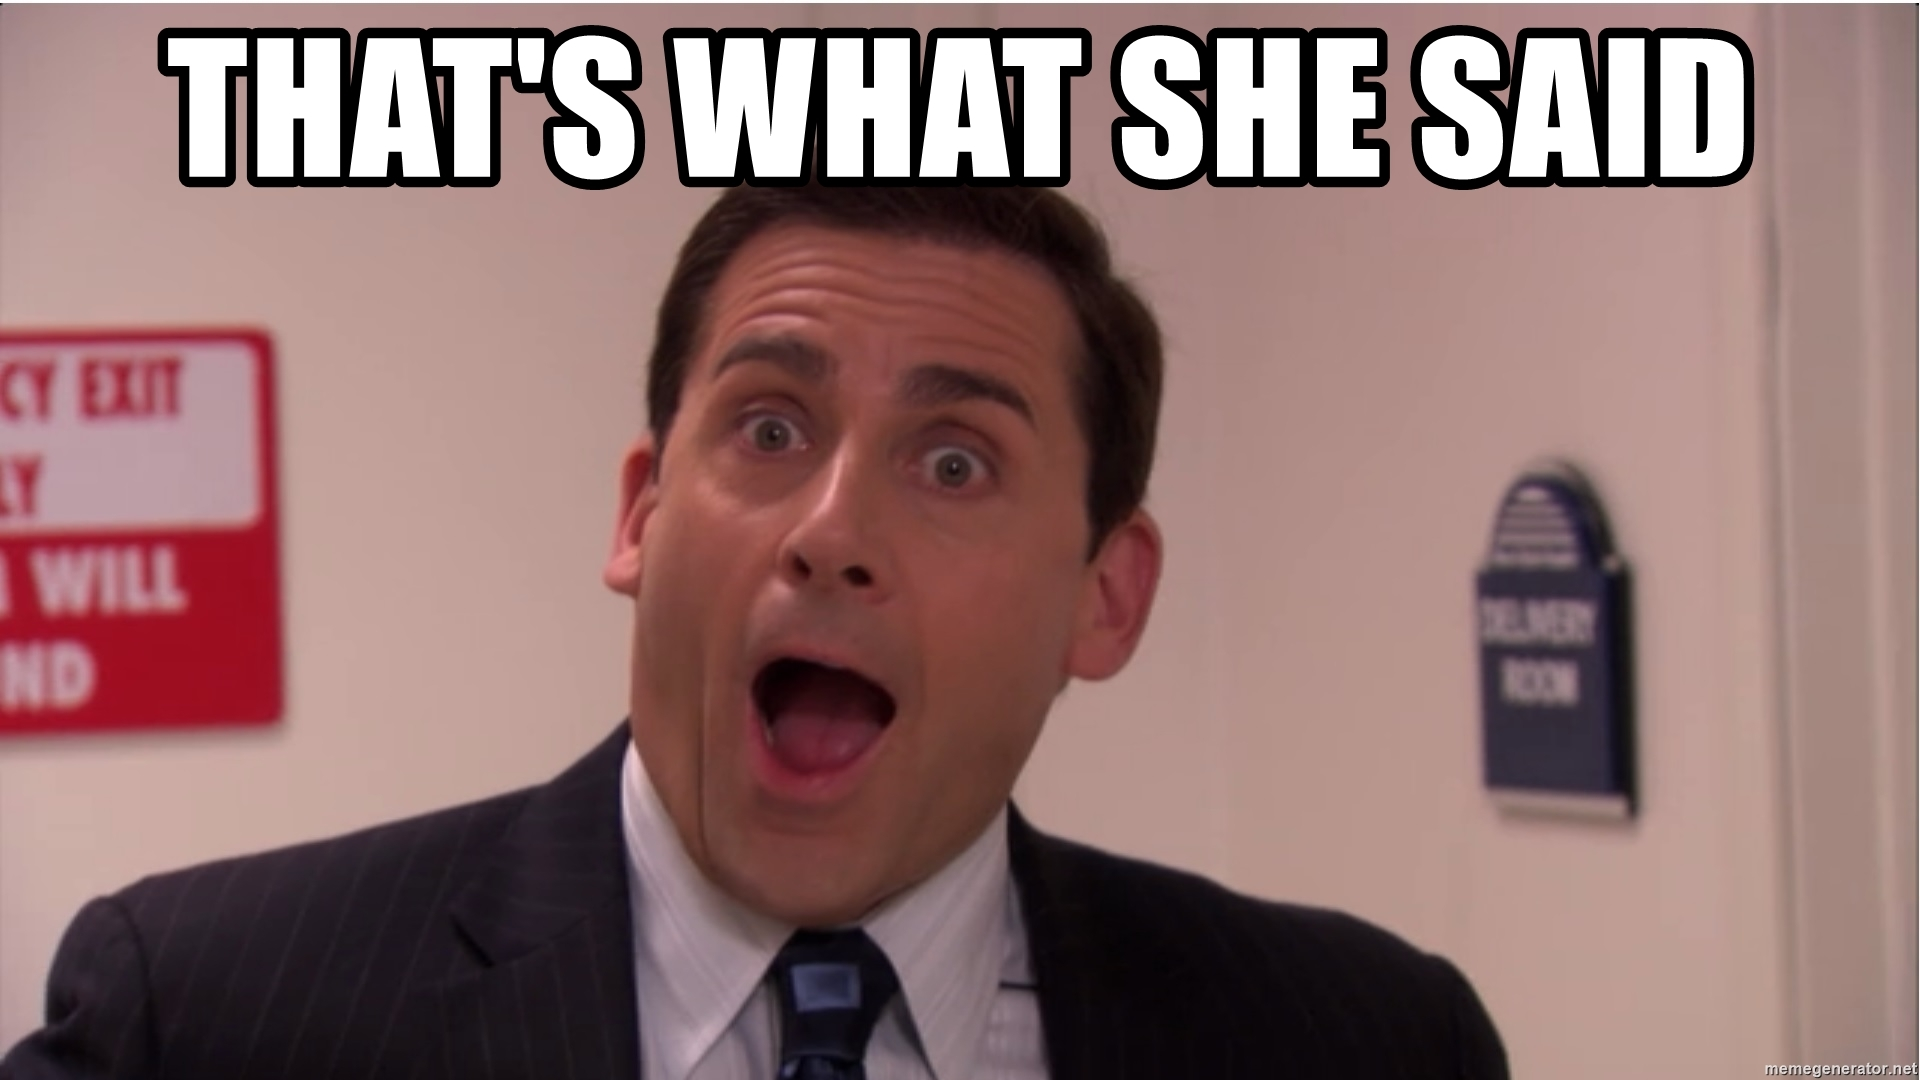

### For Sentiment Analysis, analysis of bigrams, trigrams, etc on The Office transcripts refer to this amazing [notebook](https://www.kaggle.com/nilimajauhari/the-office-sentiment-analysis) by [Neelima Jauhari](https://www.kaggle.com/nilimajauhari).

### I will add more insights in the subsequent versions.
### Work in progress...